In [ ]:
from skimage.transform import resize
from skimage.io import imread
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dir_path="/content/drive/MyDrive/Deep_Learning/Dogs_breed_dataset"

In [ ]:
categories=[i for i in os.listdir(dir_path)]
categories

['Afgan Hound dog',
 'Alaskan Malamute dog',
 'Akita dog',
 'American Bulldog dog',
 'Bugg dog',
 'Bulldog dog',
 'Affenhuahua dog',
 'Bichon Frise dog',
 'Boxer dog',
 'Bocker dog',
 'Borzoi dog',
 'Belgian Tervuren dog',
 'Beagle dog',
 'Auggie dog']

In [ ]:
labels=[i for i in range(len(categories))]
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [ ]:
img_size = 150
x = []
y = []

for category,label in zip(categories,labels):
  folder_path = os.path.join(dir_path,category)
  img_names = os.listdir(folder_path)

  for img_name in img_names:
    img_path = os.path.join(folder_path,img_name)
    img = cv2.imread(img_path)
    try:
      gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      resized_img = cv2.resize(gray,(img_size,img_size))
      x.append(resized_img)
      y.append(label)

    except Exception as e:
      print("Exception",e)

      # cv2.imwrite(img_path,img)



Exception OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



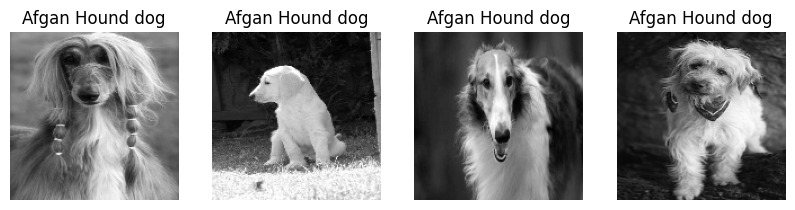

In [ ]:
plt.figure(figsize=(10,10))
%matplotlib inline
for i in range(0,4):
 plt.subplot(1,4,i+1)
 plt.imshow(x[i],cmap='gray')
 plt.title(categories[y[i]])
 plt.axis('off')
plt.show()

In [ ]:
x=np.array(x)/255.0
print(x.shape)
x=np.reshape(x,(x.shape[0],img_size,img_size,1))
y=np.array(y)
print(x.shape)
print(y.shape)

(694, 150, 150)
(694, 150, 150, 1)
(694,)


In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
x_train.shape

(555, 150, 150, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,Conv2D,MaxPooling2D
# from tensorflow.keras.callbacks import ModelCheckpoint
# ModelCheckpoint==>for best model
# Dropout==>for avoiding overfitting

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128,activation="relu"))

model.add(Dense(14,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x_train.shape

(555, 150, 150, 1)

In [ ]:
y_train.shape

(555, 14)

In [ ]:
Model=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 366ms/step - accuracy: 0.0825 - loss: 2.6796 - val_accuracy: 0.0935 - val_loss: 2.6333
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.1683 - loss: 2.5576 - val_accuracy: 0.1942 - val_loss: 2.4295
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4058 - loss: 1.9820 - val_accuracy: 0.3597 - val_loss: 2.1587
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6176 - loss: 1.2942 - val_accuracy: 0.5036 - val_loss: 1.7314
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8188 - loss: 0.6341 - val_accuracy: 0.6259 - val_loss: 1.9191
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9103 - loss: 0.2997 - val_accuracy: 0.6547 - val_loss: 1.7859
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9518 - loss: 0.2362 - val_accuracy: 0.6403 - val_loss: 2.0005
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9617 - loss: 0.1673 - val_accuracy: 0.6475 

In [ ]:
y_predict=model.predict(x_test)
y_predicted=np.argmax(y_predict,axis=1)
y_predicted

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([ 5,  1,  7,  4, 12,  7,  5,  2,  5, 10,  0, 11,  7, 11,  9,  9,  2,
       10, 12, 13,  9,  8, 11,  6,  6,  8, 12,  0,  1,  7,  0,  6,  4, 10,
        7,  6,  7,  6,  7,  6,  7,  8, 10,  1,  6,  6,  2,  1,  7,  7,  8,
        4,  8,  2,  6,  9,  0, 12, 12, 12,  5,  0,  9,  7, 11,  2,  5, 12,
        9,  0,  9,  2,  5,  2, 11,  8,  0, 13,  0,  5,  1,  7,  7,  0,  2,
        5,  3,  6,  0, 10, 12,  6,  6,  3,  7,  1,  8,  2,  6,  1,  3,  3,
        6,  0,  7,  3,  4, 12, 13, 10,  5,  5,  6,  0,  7,  7, 13, 11,  2,
        4,  4,  9,  6,  4,  6,  5,  3,  6,  9, 13,  7,  5,  0,  8,  2,  9,
       12,  8,  8])

In [ ]:
target_test=np.argmax(y_test,axis=1)
target_test

array([ 5,  1,  7,  4, 12, 10,  8,  2,  5, 10, 10, 11,  7,  5,  9,  9,  2,
       10,  3, 13,  9,  8, 10,  6,  6,  3,  8,  0, 12,  7,  0, 11,  4,  8,
        7, 11,  7,  6,  7,  6,  9, 10,  1,  1,  2,  6,  3,  1, 12, 10, 13,
       12,  8,  2,  0,  9,  0, 12, 12, 12,  5,  1,  9,  9,  3,  2,  5, 12,
        9,  3,  9,  2,  5,  2, 11,  8,  1, 13,  0,  5,  1,  7,  4, 11,  2,
        6,  3,  6, 12, 10, 12,  6,  6,  3,  7, 12,  8,  2, 10, 12,  3,  3,
        8,  5,  9,  3,  4, 12, 13, 10, 11, 11, 13,  0,  7,  7, 13, 11,  2,
        4,  4,  9, 13,  4,  6,  2,  3,  4, 10, 13,  7,  5,  1,  8,  4,  9,
        3, 10,  8])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predicted,target_test)

0.6546762589928058

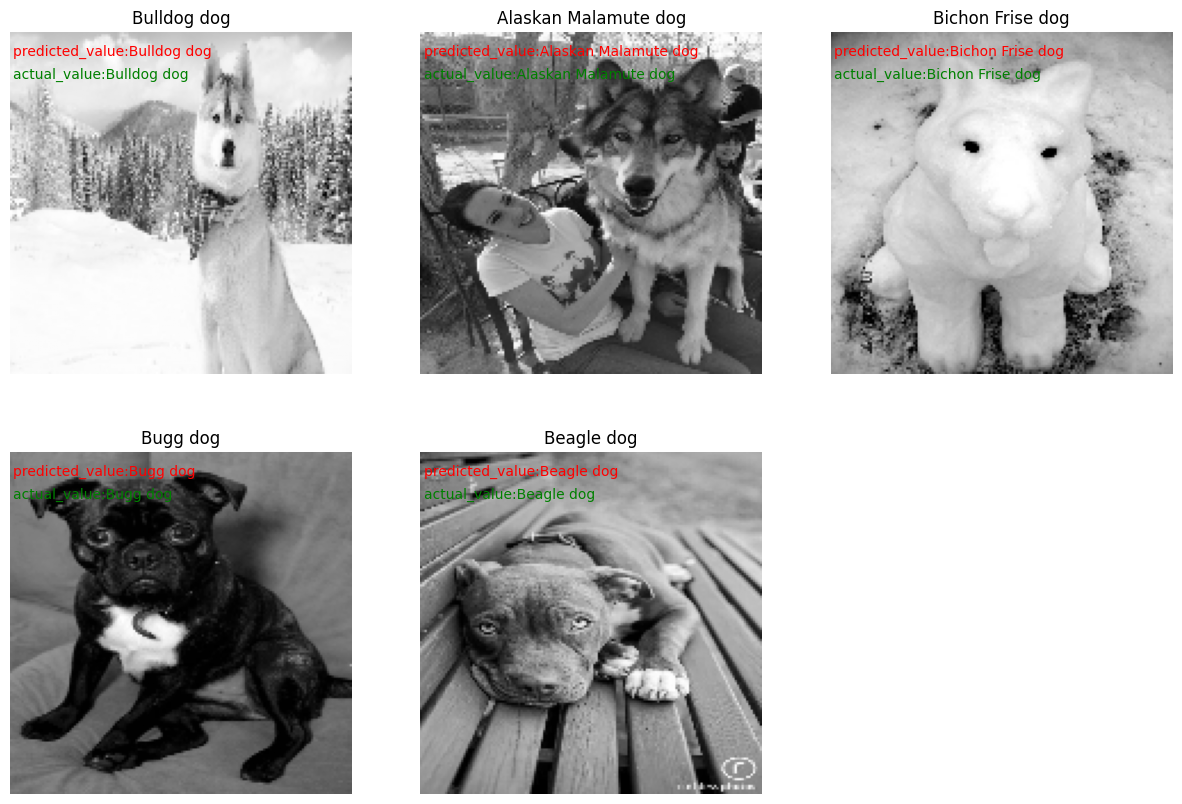

In [ ]:
plt.figure(figsize=(15,10))
for i in range(0,5):
  plt.subplot(2,3,i+1)
  plt.imshow(x_test[i].reshape(150,150,1),cmap='gray')
  plt.title(categories[y_predicted[i]])
  plt.text(1,10,f'predicted_value:{categories[y_predicted[i]]}',color='red')
  plt.text(1,20,f'actual_value:{categories[target_test[i]]}',color='green')
  plt.axis('off')
plt.show()



In [ ]:
img_path='/content/drive/MyDrive/Deep_Learning/Dogs_breed_dataset/Akita dog/Image_10.jpg'
img=imread(img_path)
img_resize=resize(img,(150,150,1))
img_reshape=img_resize.reshape(1,150,150,1)
prediction=model.predict(img_reshape)
categories[prediction.argmax()]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'Akita dog'